# Extraction of capacities from .txt file(s) exported from EC-Lab

December 2023  
Martin Aaskov Karlsen  
Postdoc  
Ravnsbæk Group  
Department of Chemistry  
Aarhus University

The code in this iPython notebook will extract capacities from .txt file(s) 
exported from the  
EC-Lab software. If the columbic efficiency is exported, it will also be 
extracted, otherwise it  
will be calculated from the discharge and charge capacities.

The extracted data will be written to .txt files and plotted as .png, .pdf, and 
.svg files.

Imports.

In [28]:
import sys
from pathlib import Path
from io import StringIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Collecting input .txt file(s).

In [29]:
txt_input_path = Path.cwd() / "txt_input"
if not txt_input_path.exists():
    txt_input_path.mkdir()
    sys.exit(f"\n{80*'-'}\nA folder called '{txt_input_path.name}' has been "
             f"created.\nPlease put your input .txt files there and rerun the "
             f"cell.\n{80*'-'}")
txt_input_files = list(txt_input_path.glob("*.txt"))
if len(txt_input_files) == 0:
    sys.exit(f"\n{80*'-'}\nNo .txt files were found in the "
             f"'{txt_input_path.name}' folder.\nPlease put your input .txt "
             f"files there and rerun the cell.\n{80*'-'}")

Function definitions to extract data and calculate columbic efficiencies.

In [30]:
def get_discharge_end_idx(current):
    idx = []
    for i in range(1, len(current)):
        if current[i] == 0 and current[i-1] < 0:
            idx.append(i-1)
        elif current[i-1] < 0 and current[i-1] * current[i] < 0:
            idx.append(i-1)
            
    return np.array(idx)


def get_charge_end_idx(current):
    idx = []
    for i in range(1, len(current)):
        if current[i] == 0 and current[i-1] > 0:
            idx.append(i-1)
        elif current[i-1] > 0 and current[i-1] * current[i] < 0:
            idx.append(i-1)
            
    return np.array(idx)


def calculate_columbic_efficiency(discharge_caps, charge_caps):
    ce = []
    for i in range(len(discharge_caps)-1):
        ce.append((discharge_caps[i] / charge_caps[i] * 100))
    if len(discharge_caps) == len(charge_caps):
        ce.append((discharge_caps[-1] / charge_caps[-1]) * 100)
    
    return np.array(ce)

Function definitions to write extracted data to .txt files.

In [31]:
def write_charge_capacity(charge_capapacities, name, output_path):
    cycles = np.arange(len(charge_capapacities))
    np.savetxt(output_path / f"{name}_charge_capacities.txt",
               np.column_stack((cycles, charge_capapacities)),
               delimiter="\t",
               header="cycle number\tQcharge [mAh]",
               encoding="utf-8",
               )

    return None


def write_discharge_capacity(discharge_capapacities, name, output_path):
    cycles = np.arange(len(discharge_capapacities))
    np.savetxt(output_path / f"{name}_discharge_capacities.txt",
               np.column_stack((cycles, discharge_capapacities)),
               delimiter="\t",
               header="cycle number\tQdischarge [mAh]",
               encoding="utf-8",
               )

    return None


def write_columbic_efficiency(columbic_efficiencies, name, output_path):
    cycles = np.arange(len(columbic_efficiencies))
    np.savetxt(output_path / f"{name}_columbic_efficiencies.txt",
               np.column_stack((cycles, columbic_efficiencies)),
               delimiter="\t",
               header="cycle number\tcolumbic efficiency",
               encoding="utf-8",
               )

    return None

Function definitions for plotters.

In [32]:
def plot_charge_capacity(charge_capapacities, name, plot_paths):
    fig, ax = plt.subplots(figsize=(12, 4))
    cycles = np.arange(len(charge_capapacities))
    ax.plot(cycles, charge_capapacities, "o")
    xmin, xmax = np.amin(cycles), np.amax(cycles)
    xrange = xmax - xmin
    xlim_factor = 0.01
    ax.set_xlim(xmin - xlim_factor * xrange, xmax + xlim_factor * xrange)
    ax.set_xlabel("cycle number", fontsize=20)
    ax.set_ylabel(r"$Q_{\mathrm{charge}}\;[\mathrm{mAh}]$", fontsize=20)
    ax.tick_params(axis="both", labelsize=14)
    ax.minorticks_on()
    name = f"{name}_charge_capacity"
    for p in plot_paths:
        print(f"\t\t\t{p.name}")
        plt.savefig(p / f"{name}.{p.name}", bbox_inches="tight", dpi=600)
    plt.show()

    return None


def plot_discharge_capacity(discharge_capapacities, name, plot_paths):
    fig, ax = plt.subplots(figsize=(12, 4))
    cycles = np.arange(len(discharge_capapacities))
    ax.plot(cycles, discharge_capapacities, "o")
    xmin, xmax = np.amin(cycles), np.amax(cycles)
    xrange = xmax - xmin
    xlim_factor = 0.01
    ax.set_xlim(xmin - xlim_factor * xrange, xmax + xlim_factor * xrange)
    ax.set_xlabel("cycle number", fontsize=20)
    ax.set_ylabel(r"$Q_{\mathrm{discharge}}\;[\mathrm{mAh}]$", fontsize=20)
    ax.tick_params(axis="both", labelsize=14)
    ax.minorticks_on()
    name = f"{name}_discharge_capacity"
    for p in plot_paths:
        print(f"\t\t\t{p.name}")
        plt.savefig(p / f"{name}.{p.name}", bbox_inches="tight", dpi=600)
    plt.show()

    return None


def plot_columbic_efficiency(columbic_efficiencies, name, plot_paths):
    fig, ax = plt.subplots(figsize=(12, 4))
    cycles = np.arange(len(columbic_efficiencies))
    ax.plot(cycles, columbic_efficiencies, "o")
    xmin, xmax = np.amin(cycles), np.amax(cycles)
    xrange = xmax - xmin
    xlim_factor = 0.01
    ax.set_xlim(xmin - xlim_factor * xrange, xmax + xlim_factor * xrange)
    ax.set_xlabel("cycle number", fontsize=20)
    ax.set_ylabel(r"$ce\;[\mathrm{mAh}]$", fontsize=20)
    ax.tick_params(axis="both", labelsize=14)
    ax.minorticks_on()
    name = f"{name}_columbic_efficiency"
    for p in plot_paths:
        print(f"\t\t\t{p.name}")
        plt.savefig(p / f"{name}.{p.name}", bbox_inches="tight", dpi=600)
    plt.show()

    return None

Setting up output paths.

In [33]:
txt_output_path = Path.cwd() / "txt_output"
if not txt_output_path.exists():
    txt_output_path.mkdir()
plot_folders = ["png", "pdf", "svg"]
plot_paths = [Path.cwd() / folder for folder in plot_folders]
for p in plot_paths:
    if not p.exists():
        p.mkdir()

Loading data from .txt file(s).

In [34]:
d = {}
print(f"{80*'-'}\nLoading data from .txt files...")
for i, txt in enumerate(txt_input_files):
    print(f"\t{txt.name}")
    with txt.open("r") as f:
        s = f.read().replace(",", ".")
    if i == 0:
        name_split = txt.stem.split("_")
        outputname = f"{'_'.join(name_split[0:6] + name_split[7:])}{txt.suffix}"
        df = pd.read_csv(StringIO(s), delimiter="\t")
    current = df["<I>/mA"].to_numpy()
    q_discharge = df["Q discharge/mA.h"].to_numpy()
    q_charge = df["Q charge/mA.h"].to_numpy()
    discharge_end_idx = get_discharge_end_idx(current)
    charge_end_idx = get_charge_end_idx(current)
    discharge_capacities = np.array([q_discharge[i] for i in discharge_end_idx])
    charge_capapacities = np.array([q_charge[i] for i in charge_end_idx])
    if not "Efficiency/%" in df.columns:
        columbic_efficiencies = calculate_columbic_efficiency(discharge_capacities,
                                                              charge_capapacities,
                                                              )
    else:
        columbic_efficiencies = np.array([e for e in df["Efficiency/%"].to_numpy() if e != 0])
    d[txt.stem] = dict(discharge_capacities=discharge_capacities,
                       charge_capacities=charge_capapacities,
                       columbic_efficiencies=columbic_efficiencies,
                       )
print(f"Done.\n{80*'-'}")

--------------------------------------------------------------------------------
Loading data from .txt files...
	20231005_JKV_GAL_02_25_0001_GCPL_C01.txt
	20231005_JKV_GAL_02_31_0002_GCPL_C11.txt
Done.
--------------------------------------------------------------------------------


Writing data to .txt files.

In [35]:
print(f"{80*'-'}\nWriting .txt files...")
for k in d.keys():
    print(f"\t{k}\n\t\tcharge capacities")
    write_charge_capacity(d[k]["charge_capacities"], k, txt_output_path)
    print(f"\t\tdischarge capacities")
    write_discharge_capacity(d[k]["discharge_capacities"], k, txt_output_path)
    print(f"\t\tcolumbic efficiencies")
    write_columbic_efficiency(d[k]["columbic_efficiencies"], k, txt_output_path)
print(f"Done. Please see the '{txt_output_path.name}' folder.\n{80*'-'}")

--------------------------------------------------------------------------------
Writing .txt files...
	20231005_JKV_GAL_02_25_0001_GCPL_C01
		charge capacities
		discharge capacities
		columbic efficiencies
	20231005_JKV_GAL_02_31_0002_GCPL_C11
		charge capacities
		discharge capacities
		columbic efficiencies
Done. Please see the 'txt_output' folder.
--------------------------------------------------------------------------------


Plotting data and saving to .png, .pdf, and .svg files.

--------------------------------------------------------------------------------
Plotting extracted data...
t20231005_JKV_GAL_02_25_0001_GCPL_C01
		charge capacity
			png
			pdf
			svg


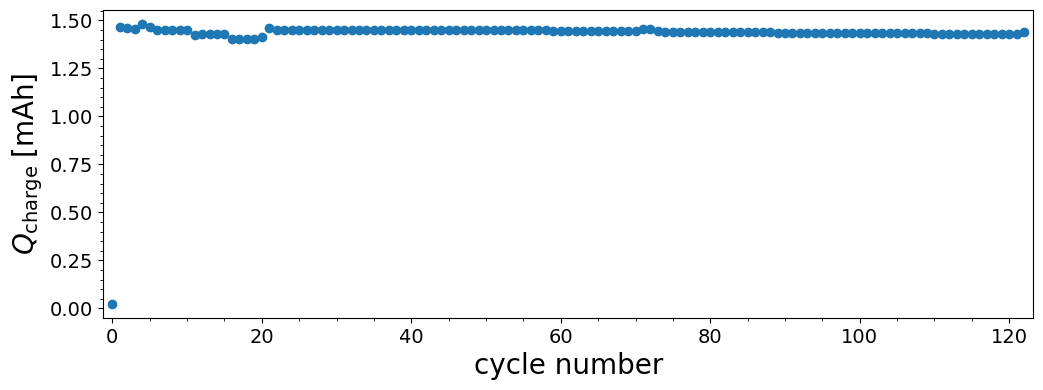

		discharge capacity
			png
			pdf
			svg


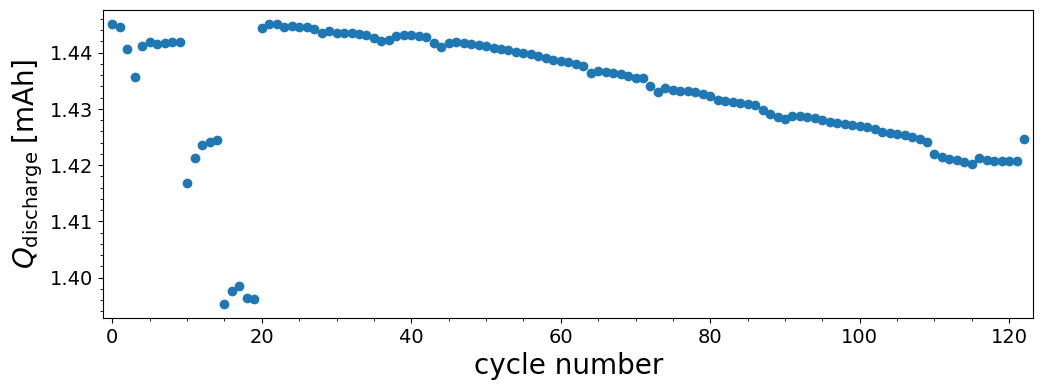

		columbic efficiency
			png
			pdf
			svg


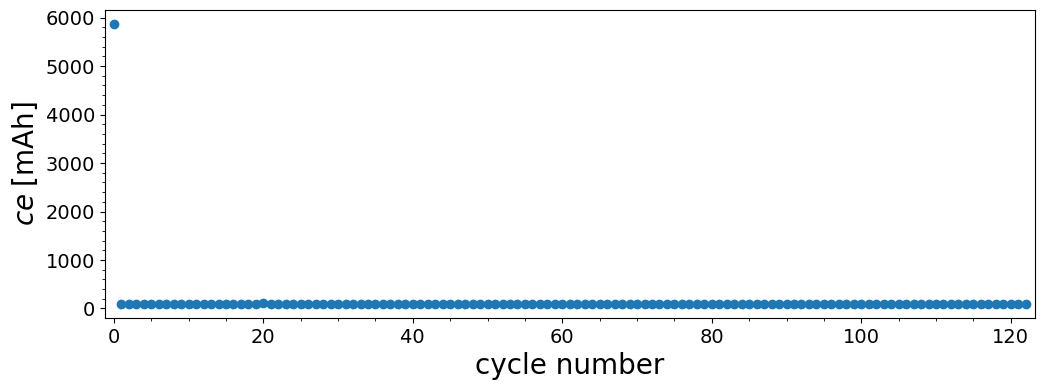

t20231005_JKV_GAL_02_31_0002_GCPL_C11
		charge capacity
			png
			pdf
			svg


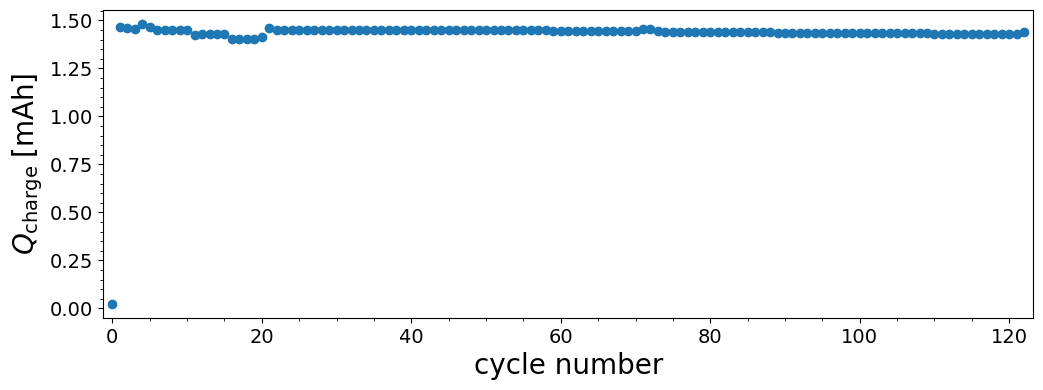

		discharge capacity
			png
			pdf
			svg


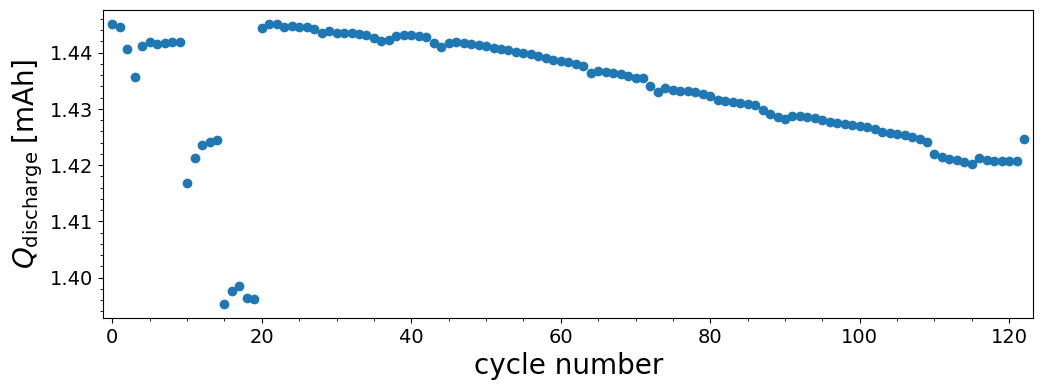

		columbic efficiency
			png
			pdf
			svg


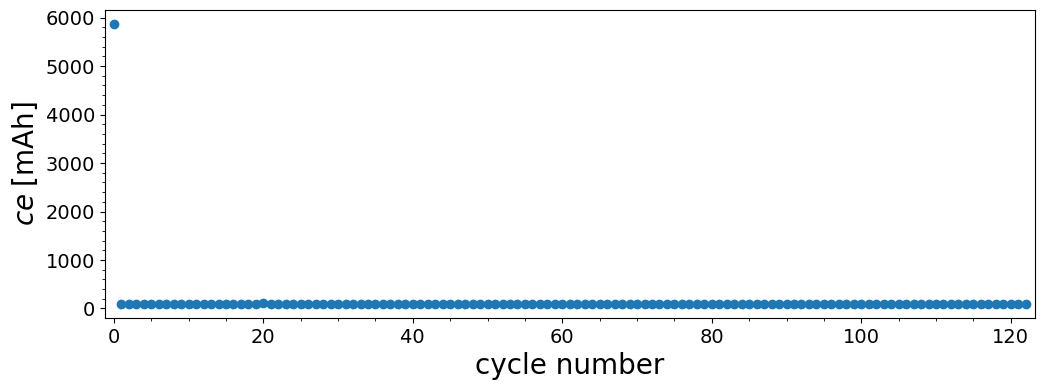

Done. Please see the '['png', 'pdf', 'svg']' folders.
--------------------------------------------------------------------------------


In [36]:
print(f"{80*'-'}\nPlotting extracted data...")
for k in d.keys():
    print(f"t{k}\n\t\tcharge capacity")
    plot_charge_capacity(d[k]["charge_capacities"], k, plot_paths)
    print(f"\t\tdischarge capacity")
    plot_discharge_capacity(d[k]["discharge_capacities"], k, plot_paths)
    print(f"\t\tcolumbic efficiency")
    plot_columbic_efficiency(d[k]["columbic_efficiencies"], k, plot_paths)
print(f"Done. Please see the '{plot_folders}' folders.\n{80*'-'}")